# Table of Contents
 <p>

In [1]:
from IPython.display import display
from ipywidgets import widgets

text = widgets.Text()
display(text)

def handle_submit(sender): 
    print(text.value + "!")
    
text.on_submit(handle_submit)

In [2]:
button = widgets.Button(description="Click me!")
display(button)

def on_button_clicked(b):
    print("Ouch!")
button.on_click(on_button_clicked)

In [3]:
def f(x):
    print(x)
widgets.interact(f, x=10)
widgets.interact(f, x=True)
widgets.interact(f, x="Text")

<function __main__.f>

In [4]:
outputText = widgets.Text()
outputText

In [5]:
inputText = widgets.Text()
def makeUpperCase(sender):
    outputText.value = inputText.value.upper()
    
inputText.on_submit(makeUpperCase)
inputText

In [7]:
from ipywidgets import widgets
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('jisc')
plt.xkcd()
t = np.arange(0.0, 1.0, 0.01)

def pltsin(f):
    plt.plot(t, np.sin(2*np.pi*t*f))
    plt.plot(t, np.sin(2*np.pi*(t+0.1)*f)+0.2)
    plt.show()
widgets.interact(pltsin, f=(1,10,.01))

<function __main__.pltsin>

<IPython.core.display.Javascript object>


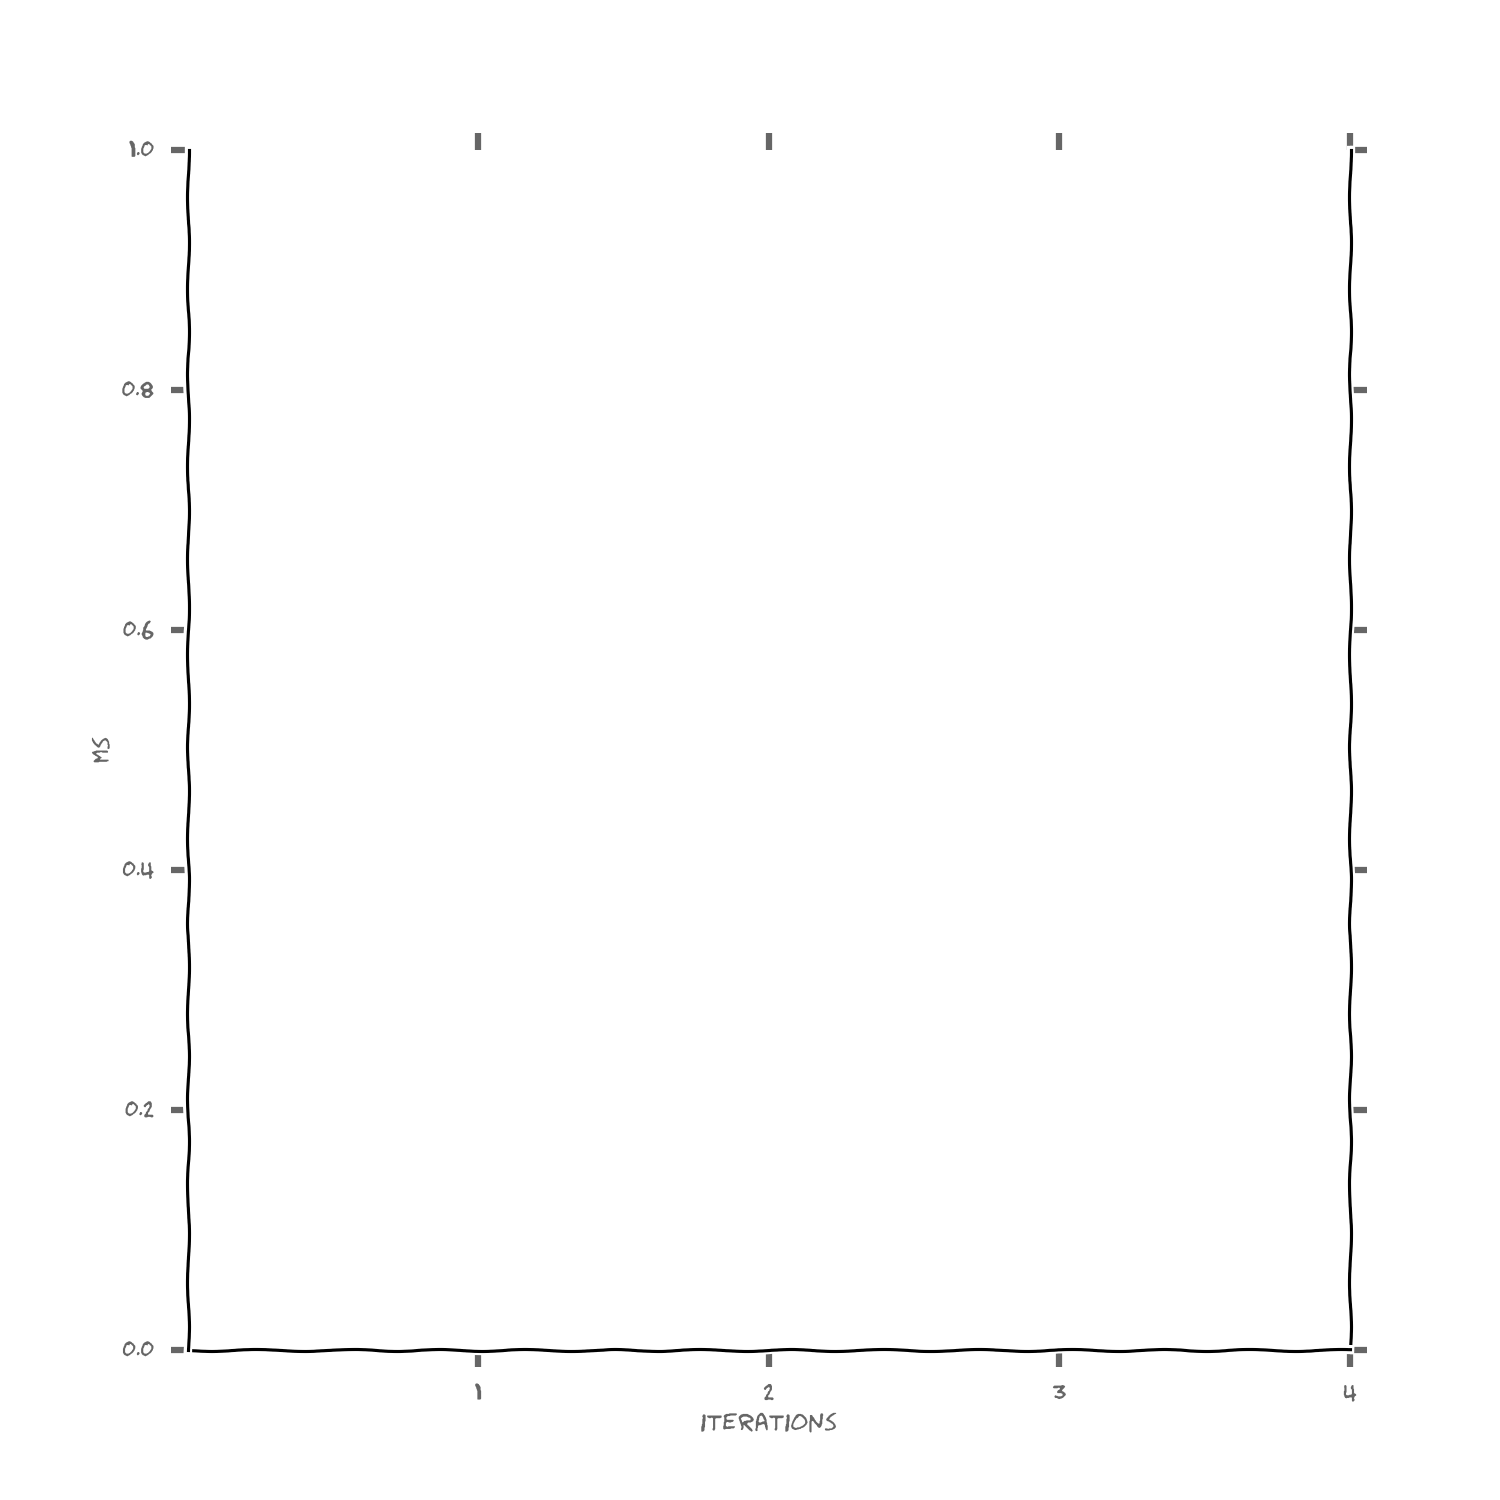

In [9]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import * 
from IPython.display import display
from ipywidgets import widgets

NUMBER_OF_PINGS = 4

# display text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

# prepare the plot
data = pd.DataFrame
x = range(1, NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
ax.set_xlabel('iterations')
ax.set_ylabel('ms')
plt.xticks(x)
plt.show()

# prepare container to put checkboxes per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes 
button = widgets.Button(description="Update the graph")

plots = {}
def handle_submit(sender):
    # magic python pinging
    res = !ping -n {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('bytes=32').fields(-2).s.replace("time=", "").replace("ms", "").split()
    if len(hits) == 0:
        print "Error on pinging"
    else:
        # rebuild plot baesd on ping result
        data = hits
        data = map(float, data)
        line, =  ax.plot(x, data, label=text.value)
        plots[text.value]=line
        plt.legend()
        plt.draw()
        # add a new checbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value = True, width = 90))
        cb_container.children = [i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

# function to deal with checkbox update button
def on_button_clicked(b):
    for c in cb_container.children:
        print(c.description)
        plots[c.description].set_visible(c.value)
        plt.legend()
        plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()

        

In [15]:
%%html

<script src="https://unpkg.com/jupyter-js-widgets@~2.1.4/dist/embed.js"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 1,
    "version_minor": 0,
    "state": {
        "a28084d048f1485b8f146072b9b77bf4": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "c827aec93ba342228878a054d91fb367": {
            "model_name": "TextModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "layout": "IPY_MODEL_a28084d048f1485b8f146072b9b77bf4",
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "53708b6899fd4fcc902ef23ce40df8f2": {
            "model_name": "ButtonStyleModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "2b93d10f00fb48eab072eeba8813d3e9": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "dc005c99e2b249f996b2fd77712c5068": {
            "model_name": "ButtonModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "style": "IPY_MODEL_53708b6899fd4fcc902ef23ce40df8f2",
                "layout": "IPY_MODEL_2b93d10f00fb48eab072eeba8813d3e9",
                "description": "Click me!",
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "20dc420034944c72bdc3b7a843700686": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "a3bea86285c04e0cad483bcd04e3eb14": {
            "model_name": "VBoxModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_dom_classes": [
                    "widget-interact"
                ],
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_20dc420034944c72bdc3b7a843700686",
                "children": [
                    "IPY_MODEL_140e640956fb49eaab48181de10e9d68",
                    "IPY_MODEL_c4bd00dcfcff494b81846cd8d17a9cea"
                ]
            }
        },
        "de568b9537984d9fb6d4ee48ab1edfe3": {
            "model_name": "SliderStyleModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "4d7a53b664114ee7ae4f2fa00e6d08de": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "140e640956fb49eaab48181de10e9d68": {
            "model_name": "IntSliderModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "style": "IPY_MODEL_de568b9537984d9fb6d4ee48ab1edfe3",
                "layout": "IPY_MODEL_4d7a53b664114ee7ae4f2fa00e6d08de",
                "min": -10,
                "max": 30,
                "_model_module_version": "~2.1.4",
                "value": 10,
                "_view_module_version": "~2.1.4",
                "description": "x"
            }
        },
        "4cd9fe73a870429b83bf614d6f102725": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "c4bd00dcfcff494b81846cd8d17a9cea": {
            "model_name": "OutputModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_view_module": "jupyter-js-widgets",
                "_dom_classes": [],
                "msg_throttle": 1,
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_4cd9fe73a870429b83bf614d6f102725",
                "_model_module": "jupyter-js-widgets"
            }
        },
        "c32a8e2f53a1464997f397d2ad8706d6": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "407138db02854fe09131d28e6014a490": {
            "model_name": "VBoxModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_dom_classes": [
                    "widget-interact"
                ],
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_c32a8e2f53a1464997f397d2ad8706d6",
                "children": [
                    "IPY_MODEL_e3b2c3b3f69241279572f68b69162d06",
                    "IPY_MODEL_c0488712e7564dd5ade5f205f1348c7e"
                ]
            }
        },
        "9c0692e9fab047ccbd1dd1a9fa994012": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "e3b2c3b3f69241279572f68b69162d06": {
            "model_name": "CheckboxModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "description": "x",
                "_model_module_version": "~2.1.4",
                "value": true,
                "disabled": false,
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_9c0692e9fab047ccbd1dd1a9fa994012"
            }
        },
        "78336eb7df644ce3bb60cb17647b66c9": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "c0488712e7564dd5ade5f205f1348c7e": {
            "model_name": "OutputModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_view_module": "jupyter-js-widgets",
                "_dom_classes": [],
                "msg_throttle": 1,
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_78336eb7df644ce3bb60cb17647b66c9",
                "_model_module": "jupyter-js-widgets"
            }
        },
        "a9eb79b5cfcd4072ad3ef338ade57495": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "ee95313e99814994851b83fcd51bd2cc": {
            "model_name": "VBoxModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_dom_classes": [
                    "widget-interact"
                ],
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_a9eb79b5cfcd4072ad3ef338ade57495",
                "children": [
                    "IPY_MODEL_b8058814b29e4894b4316873ee513c81",
                    "IPY_MODEL_298b57d6084b47c682a79fdacf5e0591"
                ]
            }
        },
        "520de2efd60548319e0f1de76585954a": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "b8058814b29e4894b4316873ee513c81": {
            "model_name": "TextModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "layout": "IPY_MODEL_520de2efd60548319e0f1de76585954a",
                "description": "x",
                "_model_module_version": "~2.1.4",
                "value": "Text",
                "_view_module_version": "~2.1.4"
            }
        },
        "d02712c382284abfb416dad18b0a1faf": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "298b57d6084b47c682a79fdacf5e0591": {
            "model_name": "OutputModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_view_module": "jupyter-js-widgets",
                "_dom_classes": [],
                "msg_throttle": 1,
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_d02712c382284abfb416dad18b0a1faf",
                "_model_module": "jupyter-js-widgets"
            }
        },
        "1e6abe0b39e04225b9f91d446e70345a": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "a575548333394b2e8805102e0a87553e": {
            "model_name": "TextModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "layout": "IPY_MODEL_1e6abe0b39e04225b9f91d446e70345a",
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "62fb45c71a574877937e72555089899f": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "db3f1a18deb444fc91dc9e8f929656da": {
            "model_name": "TextModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "layout": "IPY_MODEL_62fb45c71a574877937e72555089899f",
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "71ff2de74501425186e8e9f6afe3050b": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "2f009be6e3dc4c069fdb29014758dafa": {
            "model_name": "VBoxModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_dom_classes": [
                    "widget-interact"
                ],
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_71ff2de74501425186e8e9f6afe3050b",
                "children": [
                    "IPY_MODEL_f747ad4e0a0942629167e00604a7ca88",
                    "IPY_MODEL_32e54b4f032f4b2fa41504482bb37636"
                ]
            }
        },
        "d30db50922914028bfac345d12b180a5": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "f747ad4e0a0942629167e00604a7ca88": {
            "model_name": "FloatSliderModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "layout": "IPY_MODEL_d30db50922914028bfac345d12b180a5",
                "min": 1,
                "max": 10,
                "_model_module_version": "~2.1.4",
                "value": 5,
                "_view_module_version": "~2.1.4",
                "step": 0.01,
                "description": "f"
            }
        },
        "31b1ca0471824a738d9b262790eee515": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "32e54b4f032f4b2fa41504482bb37636": {
            "model_name": "OutputModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_view_module": "jupyter-js-widgets",
                "_dom_classes": [],
                "msg_throttle": 1,
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_31b1ca0471824a738d9b262790eee515",
                "_model_module": "jupyter-js-widgets"
            }
        },
        "157e89ec8f744dd0ad4ea8a59208098f": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "ba5c7264623b48348a2955f081c0bda5": {
            "model_name": "TextModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "layout": "IPY_MODEL_157e89ec8f744dd0ad4ea8a59208098f",
                "description": "Domain to ping",
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "933f5ed504ab4bdd9801540a865bb94f": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "a92c355001e34098b40a4f07d069f104": {
            "model_name": "HBoxModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_933f5ed504ab4bdd9801540a865bb94f"
            }
        },
        "a1c28a01e1e24ff095b5c2f794563957": {
            "model_name": "ButtonStyleModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "543e522a429544e0a664de5881761af3": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "f2751616b246404e89bb0925c600fc95": {
            "model_name": "ButtonModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "style": "IPY_MODEL_a1c28a01e1e24ff095b5c2f794563957",
                "layout": "IPY_MODEL_543e522a429544e0a664de5881761af3",
                "description": "Update the graph",
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "8756010dd8194b27bcdd7ad70a843ebc": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "d912e11de7fd43309c92bb195f5cbdd2": {
            "model_name": "TextModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "layout": "IPY_MODEL_8756010dd8194b27bcdd7ad70a843ebc",
                "description": "Domain to ping",
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "1096bae28a004e0fa32ef68d41ab8185": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "5970c9f96a2b44b491d32b37935f77b3": {
            "model_name": "HBoxModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4",
                "layout": "IPY_MODEL_1096bae28a004e0fa32ef68d41ab8185"
            }
        },
        "c418cf630ac344768ef24589b1e43822": {
            "model_name": "ButtonStyleModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "c7680829d8f645cba4f02db49e1281ec": {
            "model_name": "LayoutModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        },
        "469054e275bb4a94a47c3a12251e60c7": {
            "model_name": "ButtonModel",
            "model_module": "jupyter-js-widgets",
            "model_module_version": "~2.1.4",
            "state": {
                "style": "IPY_MODEL_c418cf630ac344768ef24589b1e43822",
                "layout": "IPY_MODEL_c7680829d8f645cba4f02db49e1281ec",
                "description": "Update the graph",
                "_model_module_version": "~2.1.4",
                "_view_module_version": "~2.1.4"
            }
        }
    }
}
</script>
<script type="application/vnd.jupyter.widget-view+json">
{
    "model_id": "c827aec93ba342228878a054d91fb367"
}
</script>
<script type="application/vnd.jupyter.widget-view+json">
{
    "model_id": "dc005c99e2b249f996b2fd77712c5068"
}
</script>
<script type="application/vnd.jupyter.widget-view+json">
{
    "model_id": "a3bea86285c04e0cad483bcd04e3eb14"
}
</script>
<script type="application/vnd.jupyter.widget-view+json">
{
    "model_id": "407138db02854fe09131d28e6014a490"
}
</script>
<script type="application/vnd.jupyter.widget-view+json">
{
    "model_id": "ee95313e99814994851b83fcd51bd2cc"
}
</script>
<script type="application/vnd.jupyter.widget-view+json">
{
    "model_id": "a575548333394b2e8805102e0a87553e"
}
</script>
<script type="application/vnd.jupyter.widget-view+json">
{
    "model_id": "db3f1a18deb444fc91dc9e8f929656da"
}
</script>
<script type="application/vnd.jupyter.widget-view+json">
{
    "model_id": "2f009be6e3dc4c069fdb29014758dafa"
}
</script>
<script type="application/vnd.jupyter.widget-view+json">
{
    "model_id": "d912e11de7fd43309c92bb195f5cbdd2"
}
</script>
<script type="application/vnd.jupyter.widget-view+json">
{
    "model_id": "5970c9f96a2b44b491d32b37935f77b3"
}
</script>